### Exploratory Data Analysis 

* dataset: 
    
    https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
    
    It is re-processed and cross-checked dataset from 
    https://archive.ics.uci.edu/ml/datasets/Heart+Disease


* data description:

    1. age: age in years
    2. sex: sex (1 = male; 0 = female)
    3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
    4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    5. chol: serum cholestoral in mg/dl
    6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    8. thalach: maximum heart rate achieved
    9. exang: exercise induced angina (1 = yes; 0 = no)
    10. oldpeak = ST depression induced by exercise relative to rest
    11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
    12. ca: number of major vessels (0-3) colored by flourosopy
    13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    
    the label:
    * condition: 0 = no disease, 1 = disease    

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import gdown

#url = 'https://drive.google.com/file/d/1xj4UFALS9w5NDCwhQ_iA7YDt3b0o6M0o/view?usp=sharing'
file_id = '1xj4UFALS9w5NDCwhQ_iA7YDt3b0o6M0o'
output = 'heart.csv'
gdown.download(f"https://drive.google.com/uc?export=download&confirm=pbef&id={file_id}", output)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1xj4UFALS9w5NDCwhQ_iA7YDt3b0o6M0o
To: /mnt/SSD1/WORK/MADE/2_ML_PROD/HW/hw1/data/heart.csv
100%|██████████| 11.1k/11.1k [00:00<00:00, 13.5MB/s]


'heart.csv'

In [24]:
DATA_PATH = "./heart.csv"
#DATA_PATH = '../ronwise/ml_project/data/raw/heart.csv'

In [41]:
df = pd.read_csv(DATA_PATH)

### Basic data analysis

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [43]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', ]
categorical_features = ['sex',  'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', ]
#df.rename(columns={"condition": "target",}, inplace=True)
target = ['condition', ]

In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [46]:
# classes balance
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

### Data histograms

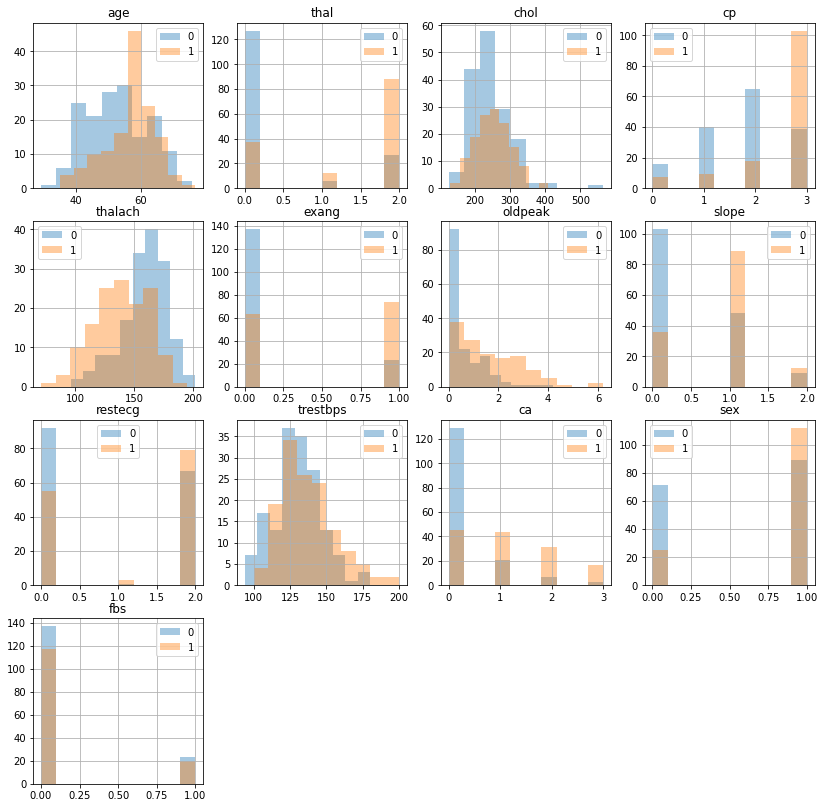

In [47]:
df_grouped = df.groupby('condition')
cols = set(df.columns) - {'condition'}

fig = plt.figure(figsize=(14, 14))
for ax_idx, col_name in enumerate(cols):
    ax = fig.add_subplot(4, 4, ax_idx + 1)
    df_grouped[col_name].hist(alpha=0.4, legend=True, ax=ax)
    ax.set_title(col_name)
  
plt.show()

### Scatter matrix

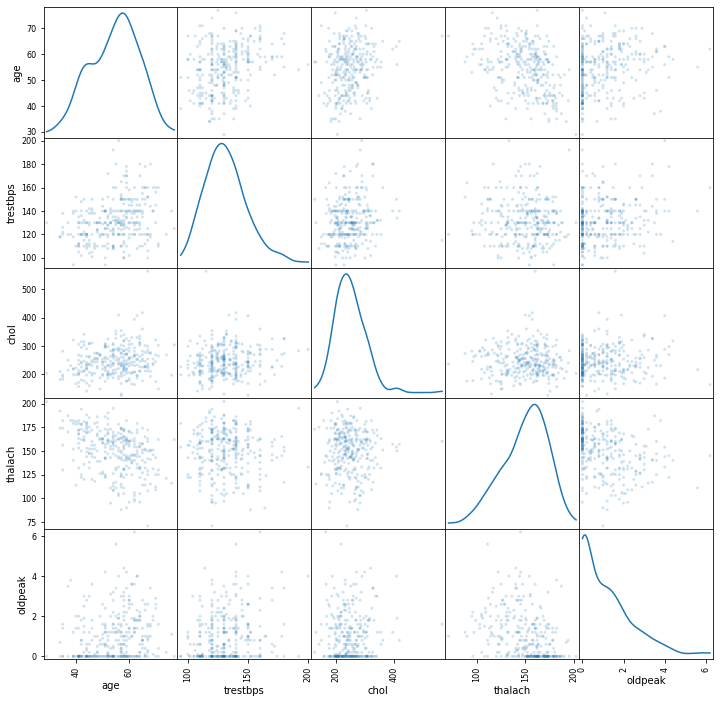

In [48]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[numerical_features], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

### Pairplot

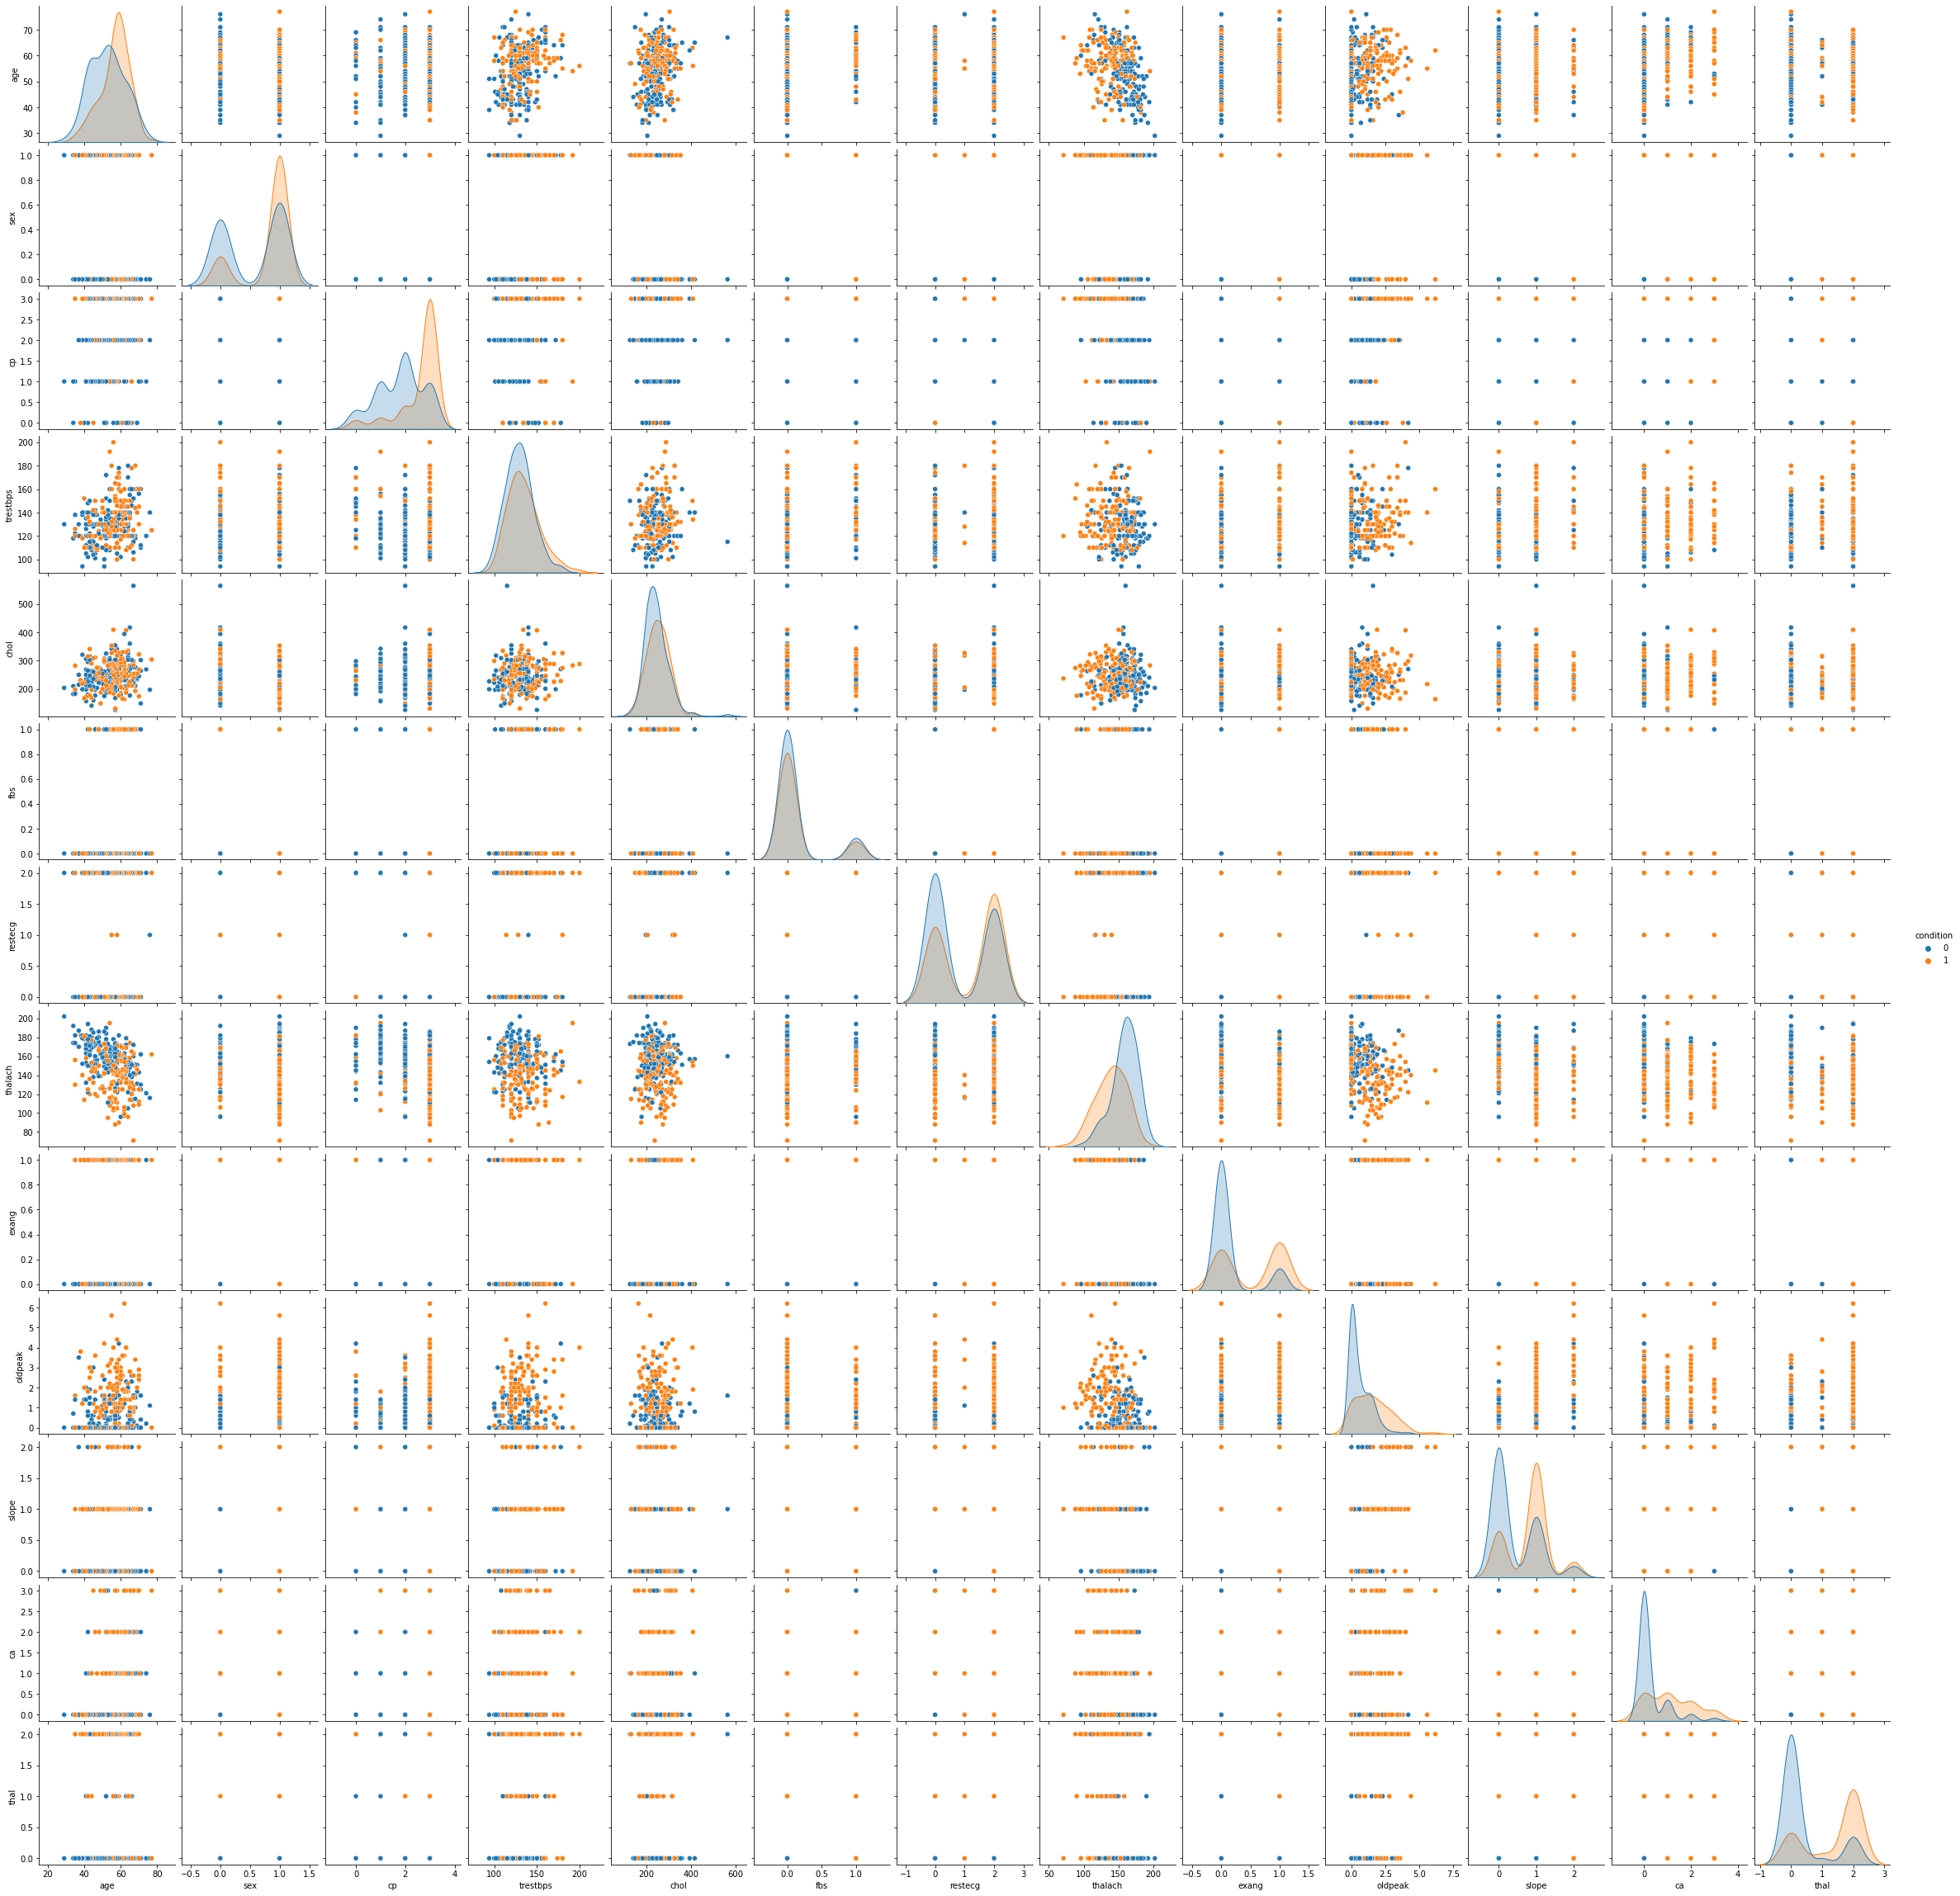

In [49]:
sns.pairplot(df, hue="condition")

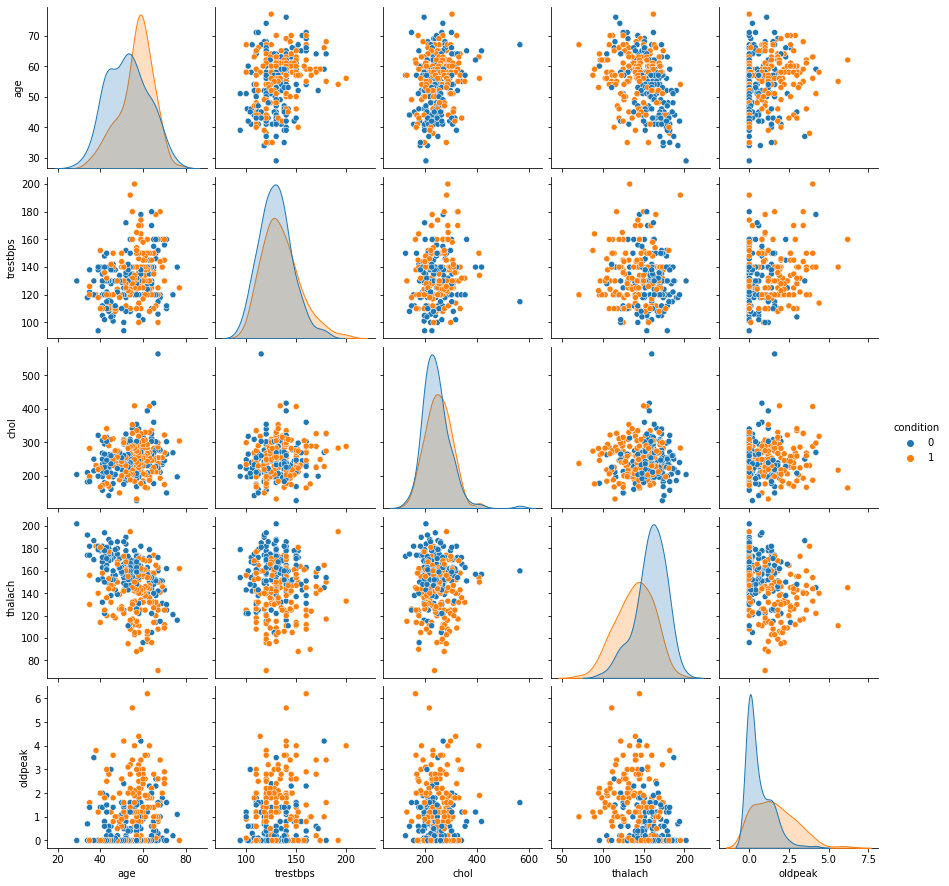

In [50]:
sns.pairplot(df[numerical_features + ['condition', ]], hue="condition")

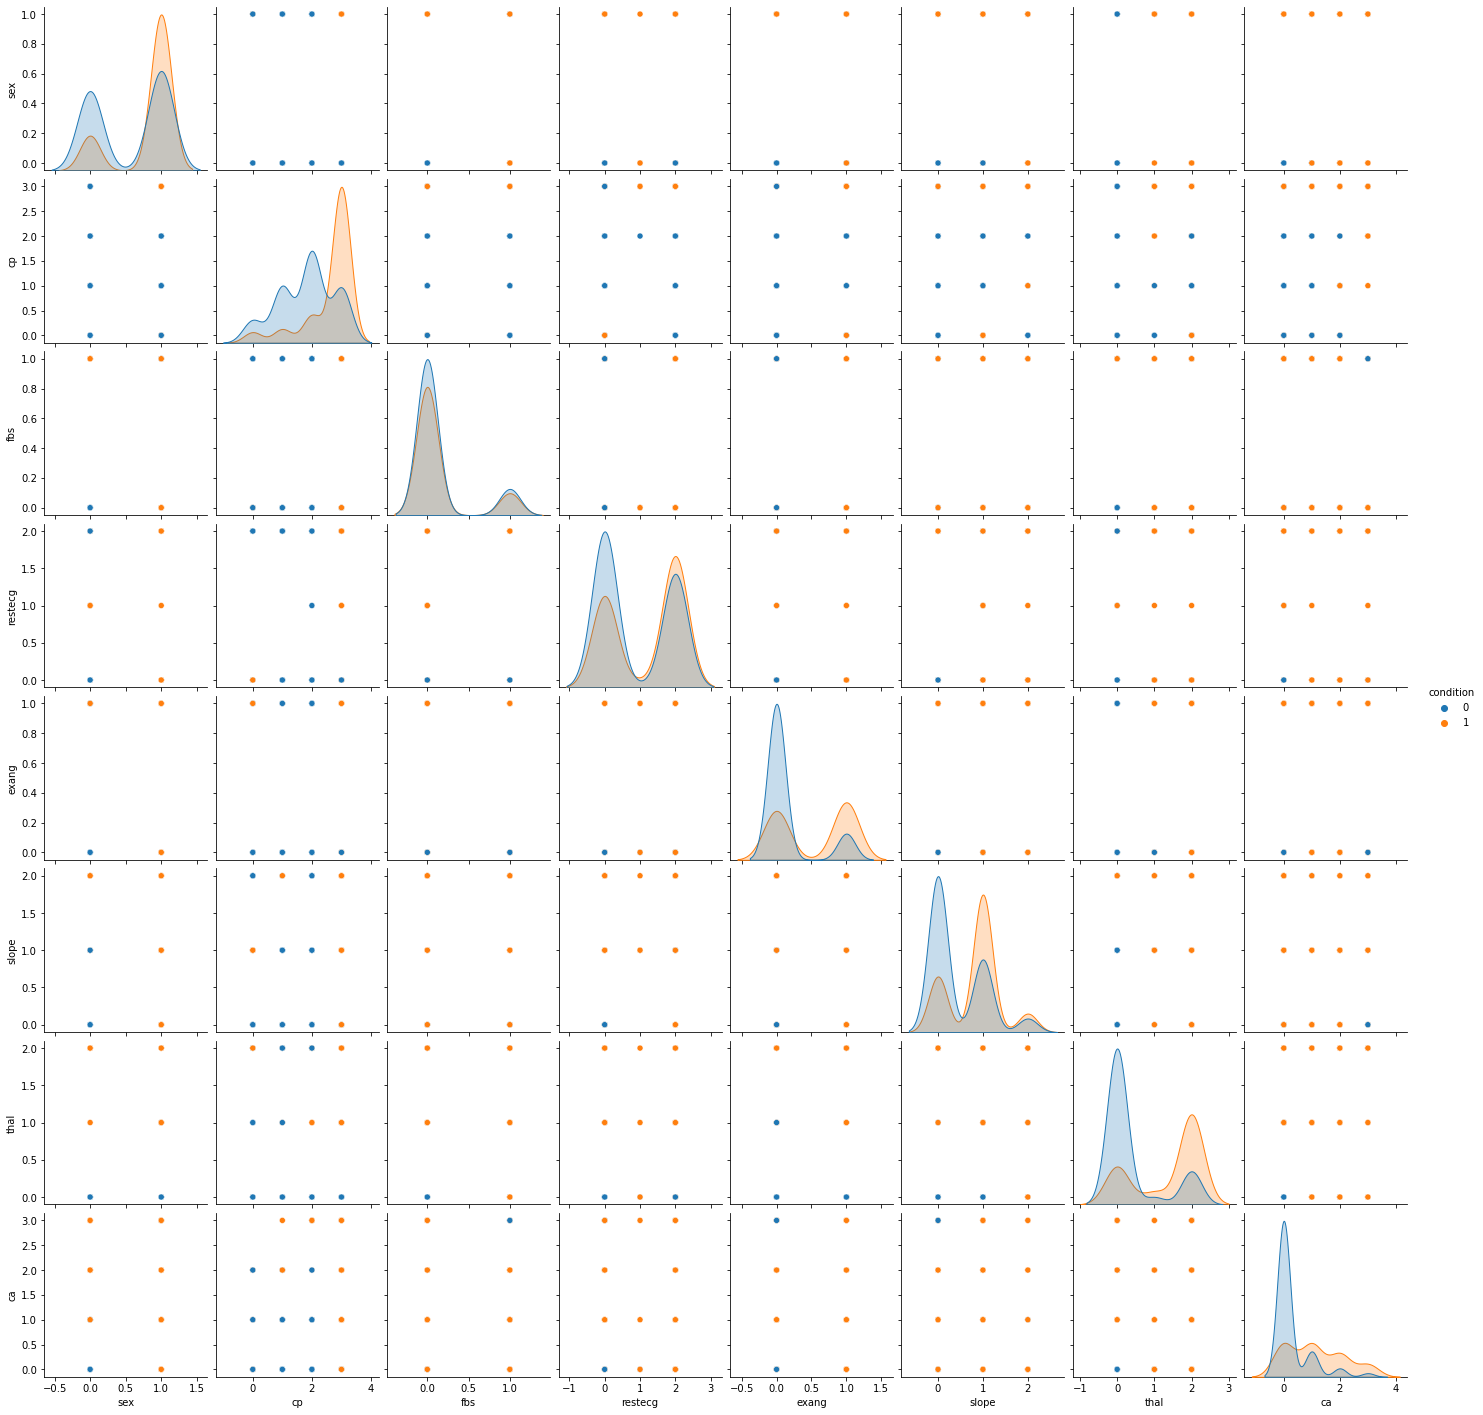

In [51]:
sns.pairplot(df[categorical_features + ['condition', ]], hue="condition")

### Models

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import plot_confusion_matrix

In [53]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', ]
categorical_features = ['sex',  'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', ]
target = ['condition']

In [54]:
df_data = df.drop(target, axis=1)
df_target = df[target]

X_train, X_test, y_train, y_test = train_test_split(df, df_target.values, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# OHE for categorical variables
ohe = OneHotEncoder(sparse=False, drop='first').fit(X_train[categorical_features].values)

# scaler
scaler = MinMaxScaler().fit(X_train[numerical_features].values)

# create datasets
X_train = np.hstack((scaler.transform(X_train[numerical_features].values), ohe.transform(X_train[categorical_features].values)))
X_test = np.hstack((scaler.transform(X_test[numerical_features].values), ohe.transform(X_test[categorical_features].values)))

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [55]:
# LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(Cs=[0.01, 0.1, 1, 5, 10], cv=5, random_state=42, solver="liblinear", scoring="accuracy").fit(X_train, y_train)
best_parameters = [clf.C_, clf.l1_ratio_]
best_score = clf.score(X_test, y_test)

print(f"Best parameters: C = {best_parameters[0][0]}, l1_ratio = {best_parameters[1][0]}")
print(f"Best score (accuracy) = {best_score:0.4f}")

Best parameters: C = 10.0, l1_ratio = None
Best score (accuracy) = 0.8333


In [56]:
# Random Forest classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


n_estimators = [100, 250, 500, 1000]
criterion = ['gini', 'entropy']

parameters = {'n_estimators': n_estimators,
              'criterion': criterion,
              'random_state': [42, ]}

clf = RandomForestClassifier()

cv = GridSearchCV(clf, parameters, scoring='accuracy', cv=5, n_jobs=-1)
cv.fit(X_train, y_train)

clf = RandomForestClassifier(criterion=cv.best_params_['criterion'], 
                             n_estimators=cv.best_params_['n_estimators'], 
                             random_state=cv.best_params_['random_state']).fit(X_train, y_train)

print(f"Best parameters: criterion = {cv.best_params_['criterion']}, n_estimators = {cv.best_params_['n_estimators']}")
print(f"Best score (accuracy) = {clf.score(X_test, y_test):0.4f}")

Best parameters: criterion = gini, n_estimators = 100
Best score (accuracy) = 0.8000


In [57]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = list(range(2, 20))
parameters = {'n_neighbors': neighbors}
clf = KNeighborsClassifier()

cv = GridSearchCV(clf, parameters, scoring='accuracy', cv=5, n_jobs=-1)
cv.fit(X_train, y_train)

clf = KNeighborsClassifier(n_neighbors=cv.best_params_['n_neighbors']).fit(X_train, y_train)

print(f"Best parameters: n_neighbors = {cv.best_params_['n_neighbors']}")
print(f"Best score (accuracy) = {clf.score(X_test, y_test):0.4f}")

Best parameters: n_neighbors = 7
Best score (accuracy) = 0.8222
